In [25]:
# For reading Data
import pandas as pd 

#for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

#for building model 
from sklearn.linear_model import LogisticRegression

#Model Evaluation
#from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,classification_report

# Reading the Data

In [2]:
df = pd.read_csv('../data/modifiedDigits4Classes.csv')

# Split X and Y

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

# Standardization

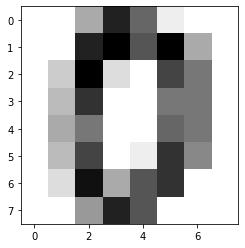

In [24]:
plt.imshow(X_train.loc[0].values.reshape((8,8)),cmap='binary')

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the model and fitting it to the data

In [5]:
clf = LogisticRegression(solver='liblinear',random_state=42,multi_class='ovr')
#liblinear implements lasso regularization 
#multiclass='ovr' implements one vs all strategy 
clf.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

# Predicting the data

In [8]:
train_pred = clf.predict(X_train_scaled)
test_pred = clf.predict(X_test_scaled)

print(f'Accuracy of model on train set is {clf.score(X_train_scaled, y_train)}')
print(f'Accuracy of model on test set is {clf.score(X_test_scaled, y_test)}')

Accuracy of model on train set is 1.0
Accuracy of model on test set is 1.0


$Precision = \frac{TP}{TP+FP}$<br>
$Recall = \frac{TP}{TP+FN}$

$F1 = 2\times \frac{Precision\times Recall}{Precision+Recall}$ <br>
Harmonic mean of Precision and Recall<br>

F1 score takes both FP and FN into account, hence more accurate 

# Evaluating our model

In [12]:
precision_train = precision_score(y_true=y_train, y_pred=train_pred,average='macro')
recall_train = recall_score(y_true=y_train, y_pred=train_pred,average='macro')
f1_train = f1_score(y_true=y_train, y_pred=train_pred,average='macro')

# We set the average to macro because of multiclass prediction so that it computes the score for each class and then takes avg of the scores

conf_matrix = confusion_matrix(y_true=y_train, y_pred=train_pred)

print(f'Precision score for train set is {precision_train}')
print(f'Recall score for train set is {recall_train}')
print(f'F1 score for train set is {f1_train}')

Precision score for train set is 1.0
Recall score for train set is 1.0
F1 score for train set is 1.0


In [14]:
# Classification report for each class 
print(classification_report(y_pred=train_pred, y_true=y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       150

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [15]:
print(conf_matrix)

[[136   0   0   0]
 [  0 146   0   0]
 [  0   0 144   0]
 [  0   0   0 150]]


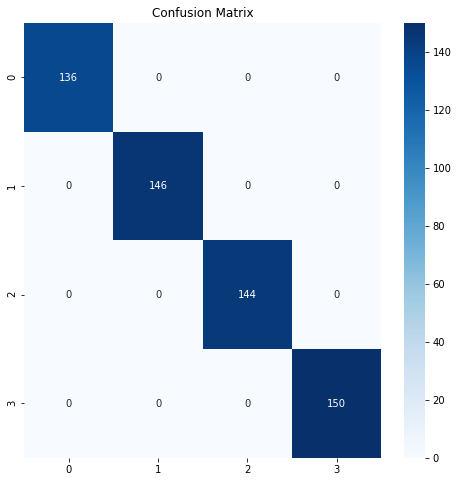

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_matrix, ax=ax, annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix')
plt.show()